In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.10.1'

In [3]:
print("gpu uygun" if tf.config.list_physical_devices("GPU") else "nothing")


gpu uygun


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorboard
"""data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])"""

'data_augmentation = tf.keras.Sequential([\n  layers.RandomFlip("horizontal_and_vertical"),\n  layers.RandomRotation(0.2),\n])'

In [5]:
labels=pd.read_csv("C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/labels.csv")

In [6]:
breeds=labels.breed.to_numpy()

In [7]:
labels.breed.value_counts().index

Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed',
       ...
       'otterhound', 'german_shepherd', 'walker_hound', 'tibetan_mastiff',
       'giant_schnauzer', 'golden_retriever', 'brabancon_griffon', 'komondor',
       'eskimo_dog', 'briard'],
      dtype='object', name='breed', length=120)

In [8]:
filenames=[f"C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/train/{value}.jpg" for key,value in labels.id.items()]

In [9]:
unique_breeds=np.unique(breeds)

In [10]:
boolean_label=[label==unique_breeds for label in breeds]

In [11]:
x=filenames
y=boolean_label

In [12]:
len(tf.constant(x))

10222

In [13]:
IMG_SIZE=224
class main_app_process:

    def __init__(self) -> None:
        pass
    def image_process(self,image_path, img_size=IMG_SIZE):
      """
      Takes an image file path and turns the image into a Tensor.
      """
      # Read in an image file
      image = tf.io.read_file(image_path)
      # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
      image = tf.image.decode_jpeg(image, channels=3)
      # Convert the colour channel values from 0-255 to 0-1 values
      image = tf.image.convert_image_dtype(image, tf.float32)
      # Resize the image to our desired value (224, 224)
      image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

      return image

    def image_for_train_and_valid(self,path,label):
      images=self.image_process(path)
      return images,label

    def create_data_batches(self,x,y=None,batch_size=32,valid_data=False,test_data=False):
      if test_data :
        print("Creating test set batches")
        data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
        data_batch=data.map(self.image_process).batch(32)
        return data_batch
      elif valid_data:
        print("Creating valid set batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch=data.map(self.image_for_train_and_valid).batch(32)
        return data_batch
      else:
        print("Creating train set batches")

        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                  tf.constant(y)))
        data=data.shuffle(buffer_size=len(x))
        data=data.map(self.image_for_train_and_valid)
        data_batch=data.batch(32)

        return data_batch

    def imager(self,image,label):
      ax=plt.figure(figsize=[10,10])
      for i in range(25):
        plt.subplot(5,5,i+1)
        
        plt.imshow(image[i])
        plt.title(unique_breeds[label[i].argmax()])
        plt.axis("off")
    
   

In [14]:
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:1000}
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2)


In [15]:
train_data=main_app_process().create_data_batches(x_train,y_train)
valid_data=main_app_process().create_data_batches(x_valid,y_valid,valid_data=True)

Creating train set batches
Creating valid set batches


In [16]:
main_app_process().create_data_batches(x_train,y_train)

Creating train set batches


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [32]:
train_images,train_labels=next(train_data.as_numpy_iterator())

In [17]:
[1,2,3,4].append([5,6,7,8])

In [44]:
len(train_images)

32

In [18]:

def fillwith_aug(train_images,train_labels):
    data_augmentation = tf.keras.Sequential([
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.2),
    ])
    

In [19]:
fillwith_aug(train_images,train_labels)

NameError: name 'train_images' is not defined

In [20]:
unique_breeds[boolean_label[0].argmax()]

'boston_bull'

In [21]:
main_app_process().imager(train_images,train_labels)

NameError: name 'train_images' is not defined

In [22]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


In [ ]:
# First Block: CNN Layers
    """layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),  # Flatten the CNN output
    
    layers.Dense(128, activation='relu'),  # Dense layer for additional learning

    # Second Block: Transfer Learning using Pre-trained Model
    """
 """tf.keras.layers.Flatten(),"""

In [74]:

# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
   
  # Setup the model layers
  model = tf.keras.Sequential([
   
    hub.KerasLayer(MODEL_URL), 
   
    
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") 
    ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.binary_(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [75]:
"""""""""from tensorflow.keras import layers"""
# Create a function which builds a Keras model
"""def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
    model = tf.keras.Sequential([
  
   
    hub.KerasLayer(MODEL_URL), 
    
    
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") 
    ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model



""""d"""ef paralel_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):

    feature_extractor_layer = hub.KerasLayer(
    model_url,
    trainable=False
    )
    model = tf_keras.Sequential([
      feature_extractor_layer,
      tf_keras.layers.Dense(units=output_shape)
    ])
    model.compile(
      optimizer=tf_keras.optimizers.Adam(),
      loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['acc']
      )
    model.build(input_shape)
    return model""""""



SyntaxError: invalid syntax (634611805.py, line 28)

In [76]:



import datetime
import os
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [77]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [57]:
early_stopping

In [58]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100,step:10}

In [59]:
def train_model():
 model=create_model()
 callbac=create_tensorboard_callback()
    
 model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=valid_data,validation_freq=1,callbacks=[callbac,early_stopping])
 return model

In [60]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


ValueError: Exception encountered when calling layer "keras_layer_1" "                 f"(type KerasLayer).

in user code:

    File "C:\Users\bahaa\anaconda3\envs\tfgpu10\lib\site-packages\tensorflow_hub\keras_layer.py", line 237, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * <tf.Tensor 'inputs:0' shape=(None, 128) dtype=float32>
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


Call arguments received by layer "keras_layer_1" "                 f"(type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 128), dtype=float32)
  • training=None

In [298]:
%load_ext tensorboard
%tensorboard --logdir C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18564), started 1:50:57 ago. (Use '!kill 18564' to kill it.)

In [388]:
model_pred_y=model.predict(valid_data,verbose=2)

7/7 - 1s - 768ms/epoch - 110ms/step


In [389]:

def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)

    

In [390]:
def imagerXX(image_list_v ,label_list_v):
      ax=plt.figure(figsize=[10,10])
      for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(image_list_v[i])
        plt.title(label_list_v[i])
        plt.axis("off")

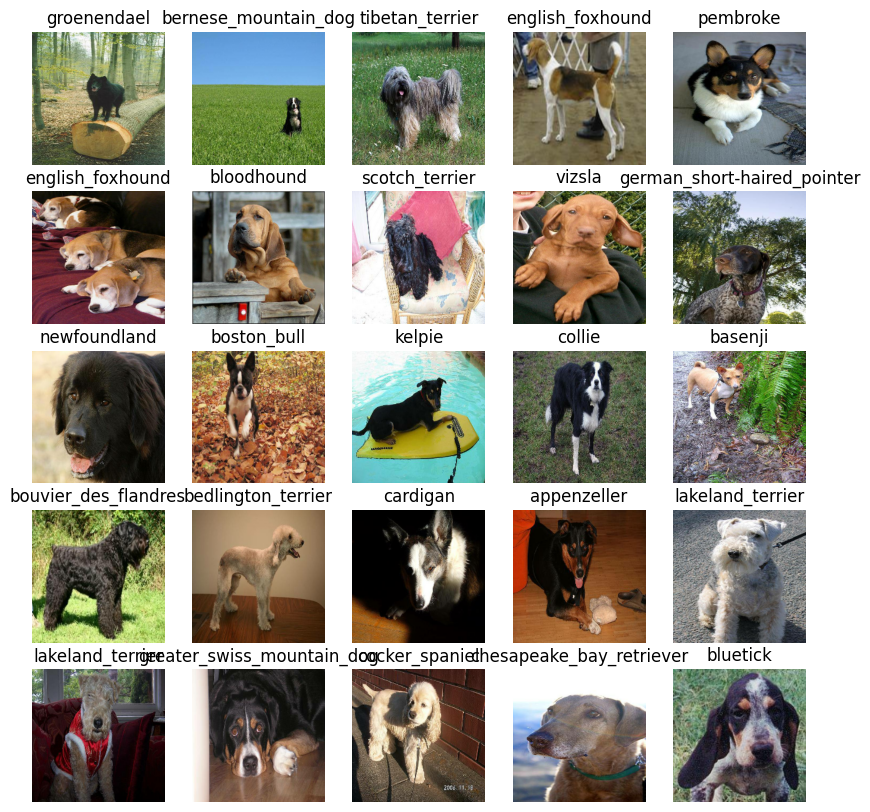

In [391]:
imagerXX(val_images,val_labels)

In [393]:
def listel(pred_y,val_image,val_label,n=0):
    pred_label=unique_breeds[pred_y[n].argmax()]
    true_label=val_label[n]
    true_image=val_image[n]

    plt.imshow(true_image)
    plt.xticks([])
    plt.yticks([])
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_y[n])*100,
                                    true_label),
                                    color=color)
    plt.show()


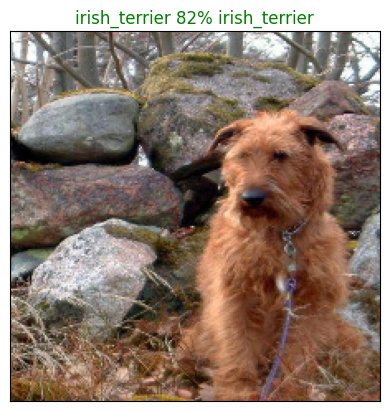

In [394]:
listel(model_pred_y,val_images,val_labels,100)

In [417]:

def pred_breeds(model_pred_y):
    breedlist=[]
    for i in range (len(model_pred_y)):
        deger=unique_breeds[np.argmax(model_pred_y[i])]
        breedlist.append(deger)

    return breedlist

In [418]:
breed_list_for_confuse=pred_breeds(model_pred_y)

In [419]:
def serial_imshow(pred_y,image,label):
    ax=plt.figure(figsize=[20,20])
    
    for i in range(100):
        pred_label=unique_breeds[pred_y[i].argmax()]
        true_label=label[i]
        true_image=image[i]
        plt.subplot(50,2,i+1)
        plt.imshow(image[i])
        plt.xticks([])
        plt.yticks([])
        if pred_label==true_label:
            color="green"
        else:
            color="red"
            
        plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_y[i])*100,
                                    true_label),
                                    color=color)
           
    

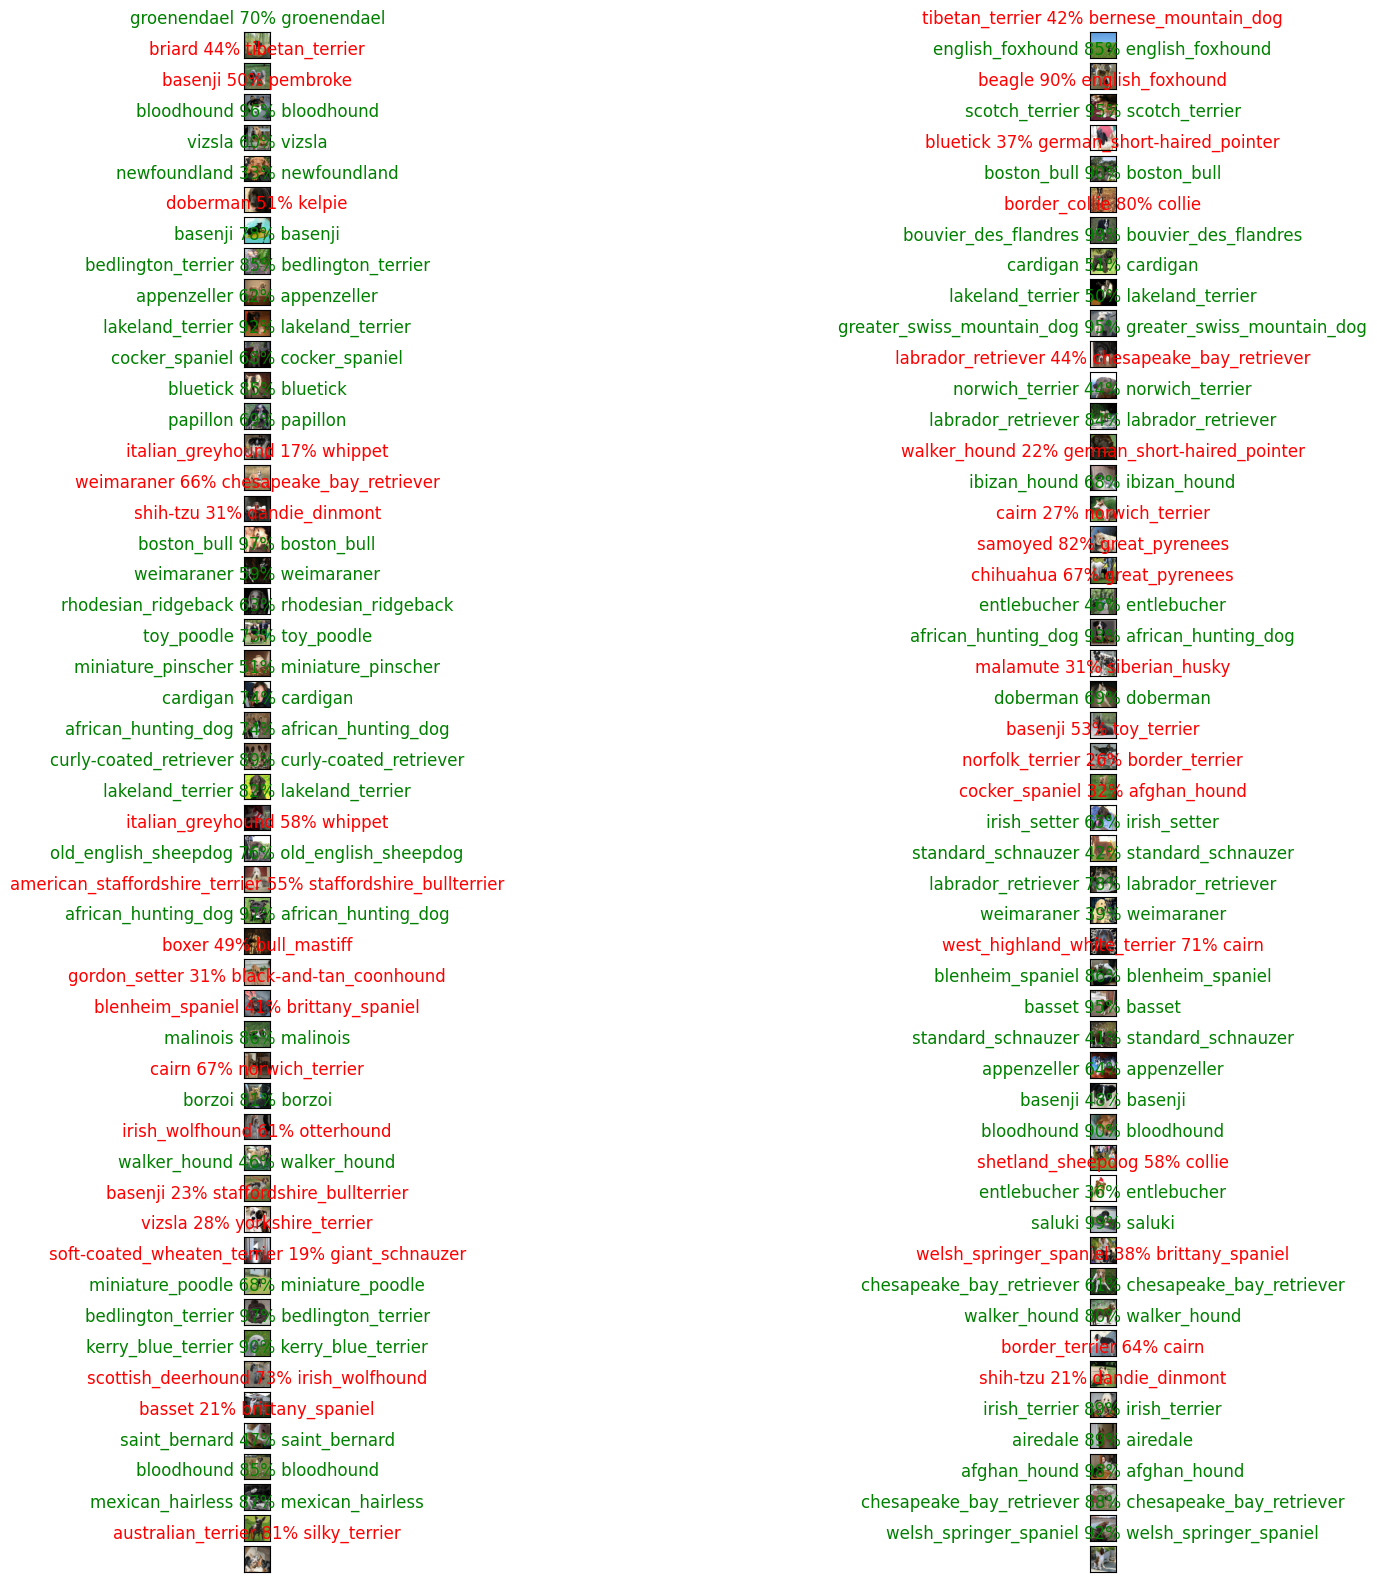

In [420]:
serial_imshow(model_pred_y,val_images,val_labels)

In [421]:
top10=model_pred_y[0].argsort()[::-1][:10]

In [422]:
top10

array([54,  0, 95, 87, 94, 62, 29, 99, 33, 52], dtype=int64)

In [423]:
unique_breeds[model_pred_y[0].argsort()[-10:][::-1]]

array(['groenendael', 'affenpinscher', 'schipperke', 'pomeranian',
       'samoyed', 'keeshond', 'chihuahua', 'shetland_sheepdog', 'collie',
       'great_pyrenees'], dtype=object)

In [424]:
model_pred_y[0].max()

0.7018017

In [425]:
val_labels[44]

'cardigan'

In [426]:
pred_bool=model_pred_y[0]
    #pred_y_breed=unique_breeds(np.argmax(pred_bool))
pred_bool_sorted=pred_bool.argsort()[-10:][::-1]
pred_top10_index=pred_bool[pred_bool_sorted]

In [427]:
def top110finder(pred_y,image,label,n=5):
    pred_bool,true_img,true_label=pred_y[n],image[n],label[n]
    #pred_y_breed=unique_breeds(np.argmax(pred_bool))
    pred_bool_sorted=pred_bool.argsort()[-10:][::-1]
    pred_top10_index=pred_bool[pred_bool_sorted]
    pred_top10_label=unique_breeds[pred_bool_sorted]
    top_plot=plt.bar(pred_top10_label,
                     pred_top10_index,
                     color="grey")
    plt.xticks(np.arange(len(pred_top10_label)),
             labels=pred_top10_label,
             rotation="vertical")
    if np.isin(true_label, pred_top10_label):
        top_plot[np.argmax(pred_top10_label == true_label)].set_color("green")
    else:
        print("yok")
        
        

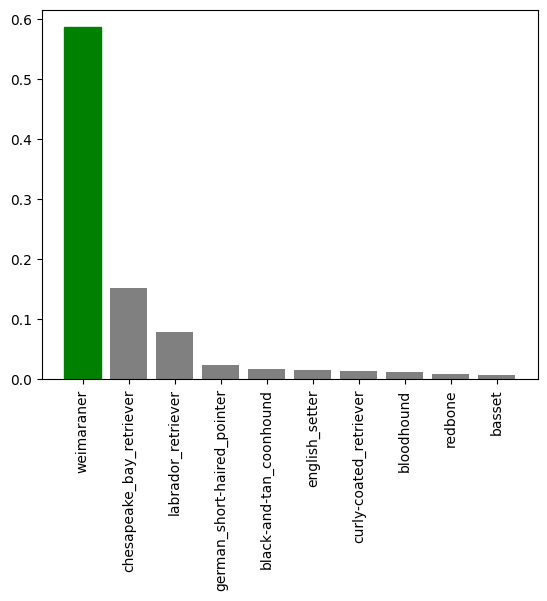

In [428]:
top110finder(model_pred_y,val_images,val_labels,36)

In [429]:
 pred_top10_label=unique_breeds[pred_bool_sorted]

In [430]:
pred_top10_label

array(['groenendael', 'affenpinscher', 'schipperke', 'pomeranian',
       'samoyed', 'keeshond', 'chihuahua', 'shetland_sheepdog', 'collie',
       'great_pyrenees'], dtype=object)

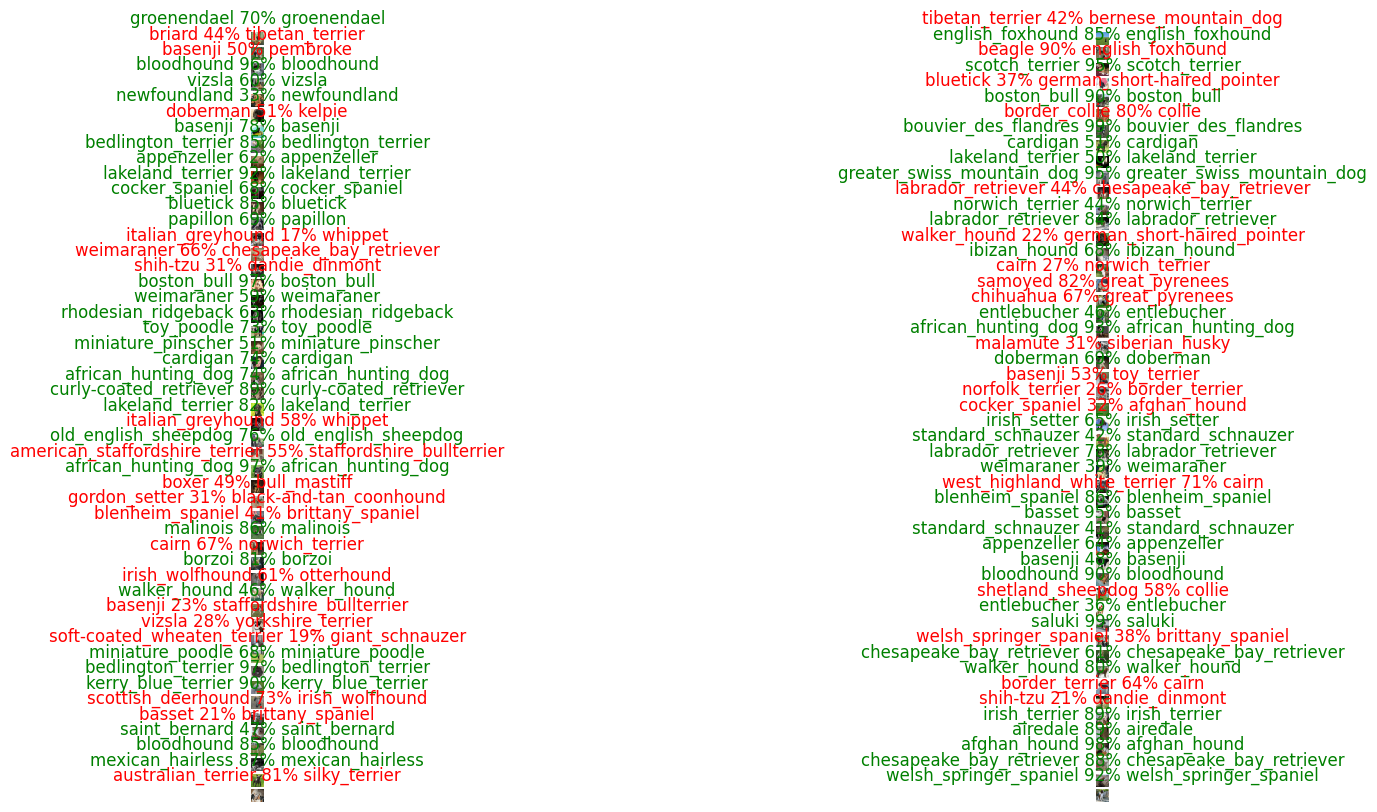

In [431]:

#listel(pred_y,val_image,val_label,n=0):
#top110finder(pred_y,image,label,n=5):

plt.figure(figsize=[20,10])    
for i in range(100):
   
    plt.subplot(50,2,i+1)
    pred_label=unique_breeds[model_pred_y[i].argmax()]
    true_label=val_labels[i]
    true_image=val_images[i]
    
    plt.imshow(true_image)
    plt.xticks([])
    plt.yticks([])
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
      
      # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                        np.max(model_pred_y[i])*100,
                                        true_label),
                                        color=color)
    #**********************************************
    pred_bool_sorted=model_pred_y[i].argsort()[-10:][::-1]
    pred_top10_index=model_pred_y[i][pred_bool_sorted]
    pred_top10_label=unique_breeds[pred_bool_sorted]
    plt.bar(pred_top10_label,
                     pred_top10_index,
                     color="grey")
   
    if np.isin(true_label, pred_top10_label):
        top_plot[np.argmax(pred_top10_label == true_label)].set_color("green")
    else:
        pass
    plt.axis("off")

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion_matrixx(breed_list,valid_label):
    return sns.heatmap(breed_list,valid_label,annot=True, cmap='coolwarm')
    

In [40]:
confusion_matrixx(breed_list=breed_list_for_confuse,valid_label=val_labels)

NameError: name 'breed_list_for_confuse' is not defined

In [ ]:
def save_modeld(model,suffix=None):
    modeldir=os.path.join("C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/models",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    modelpath=modeldir+"-"+suffix+".h5"
    print("Your models is saved into "+modelpath)
    model.save(modelpath)
    return modelpath

In [ ]:
def load_model(model_path):
    load_model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    return load_model

In [ ]:
save_modeld(model,"2000-images-Crossentropy-Adam-multinetv2")

In [41]:
loading_then_model=load_model("C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/models/20241024-160846-2000-images-Crossentropy-Adam-multinetv2.h5")

NameError: name 'load_model' is not defined

In [42]:
model.evaluate(valid_data)

7/7 [==============================] - 1s 41ms/step - loss: 1.2866 - accuracy: 0.6600


[1.2865638732910156, 0.6600000262260437]

In [43]:
loading_then_model.evaluate(valid_data)

NameError: name 'loading_then_model' is not defined

In [56]:

train_data=main_app_process().create_data_batches(x,y)


Creating train set batches


In [57]:
pro_model=create_model()
pro_callback=create_tensorboard_callback()
early_stopping_pro = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)
pro_model.fit(x=train_data,epochs=NUM_EPOCHS,callbacks=[pro_callback,early_stopping_pro])

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
320/320 [==============================] - 60s 114ms/step - loss: 1.3269 - accuracy: 0.6697
Epoch 2/100
320/320 [==============================] - 22s 69ms/step - loss: 0.3960 - accuracy: 0.8843
Epoch 3/100
320/320 [==============================] - 22s 68ms/step - loss: 0.2382 - accuracy: 0.9345
Epoch 4/100
320/320 [==============================] - 20s 61ms/step - loss: 0.1542 - accuracy: 0.9629
Epoch 5/100
156/320 [=============>................] - ETA: 11s - loss: 0.0947 - accuracy: 0.9822

KeyboardInterrupt: 

# MAKING PREDITINON ON DATA SET

In [ ]:
import os 
 
# Specify the directory you want to list files from 
directory = 'C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/test' 
 
# Get a list of all files in the specified directory 
file_list = ['C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/test/'+f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))] 
    

In [ ]:
preds_ids0=[]
for i in os.listdir(directory):
    i=i.replace(".jpg","")
    preds_ids0.append(i)

In [ ]:
file_list[:5]

In [38]:
test_data_batch=main_app_process().create_data_batches(file_list,test_data=True)

Creating test set batches


In [ ]:
def unbatchifytest(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  
  # Loop through unbatched data
  for image in data.unbatch().as_numpy_iterator():
    images.append(image)
   
  return images

# Unbatchify the validation data


In [ ]:
unbatchifytest(test_data_batch)[0]

In [ ]:
test_batch_numarize=next(test_data_batch.as_numpy_iterator())

In [ ]:
test_batch_batch_numarize[0]

In [ ]:
predict_test=pro_model.predict(test_data_batch,verbose=2)

## BU PREDİCTLERİ KAYDETMEK İÇİN OLUŞTURULMUŞ BİR CSV DOSYASI İŞLEMİDİR

In [527]:
#np.savetxt('C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/pred_arrays.csv',predict_test,delimiter=",")

In [528]:
#test_prediction_from_csv=np.loadtxt("C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/pred_arrays.csv",delimiter=",")

In [59]:
unique_breeds[predict_test[0].argmax()]

'japanese_spaniel'

In [60]:
def evaluate_our_test(predict_test,test_data_batch):
    ax=plt.figure(figsize=[10,10])
    
    for num in range (10):
        plt.subplot(5,2,num+1)
        predict_label=unique_breeds[np.argmax(predict_test[num])]
   
        plt.imshow(unbatchifytest(test_data_batch)[num])    
        plt.title("Your Predict {} {:2.0f}%".format(predict_label,
                                            np.max(predict_test[num])*100
                                            ),
                                            color="blue")
        
        plt.axis("off")
    
                                    
    

In [ ]:
evaluate_our_test(predict_test,test_data_batch)

In [62]:
 ax=plt.figure(figsize=[10,10])
    plt.subplot(1,1,1)
plt.title("{} {:2.0f}%".format(predict_label,
                                    np.max(predict_test[num])*100
                                    )
                                    )

IndentationError: unexpected indent (858537138.py, line 2)

In [66]:
general_pred_csv2=pd.DataFrame(predict_test,columns=unique_breeds)

array(['000621fb3cbb32d8935728e48679680e',
       '00102ee9d8eb90812350685311fe5890',
       '0012a730dfa437f5f3613fb75efcd4ce', ...,
       'fff74b59b758bbbf13a5793182a9bbe4',
       'fff7d50d848e8014ac1e9172dc6762a3',
       'fffbff22c1f51e3dc80c4bf04089545b'], dtype='<U32')

In [70]:
general_pred_csv2

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,1.885999e-12,1.773635e-12,4.202515e-16,8.390478e-15,3.039765e-14,3.124843e-12,1.064765e-16,6.387320e-14,2.500766e-14,...,4.638725e-13,7.174211e-15,8.440655e-15,2.086318e-15,7.515640e-15,3.334451e-13,6.318277e-14,4.956935e-15,5.821889e-11,1.064062e-11
1,00102ee9d8eb90812350685311fe5890,4.992298e-06,5.308754e-07,2.751429e-08,1.881335e-09,2.010497e-06,4.545753e-09,1.286853e-06,9.873100e-07,4.454150e-09,...,5.412681e-09,2.651628e-07,7.831947e-09,2.232755e-06,5.915397e-08,5.970463e-08,3.232225e-04,9.171864e-11,8.073708e-08,2.833921e-09
2,0012a730dfa437f5f3613fb75efcd4ce,4.455892e-12,1.830400e-07,5.871911e-09,7.687176e-12,5.111230e-12,3.670667e-09,3.613216e-12,4.768496e-13,6.586079e-10,...,2.337473e-12,1.824082e-12,2.970501e-08,6.037956e-07,3.804476e-09,7.564978e-09,9.050794e-13,8.156871e-08,4.814746e-11,2.071423e-12
3,001510bc8570bbeee98c8d80c8a95ec1,5.788761e-06,1.023348e-07,1.225004e-07,2.411930e-06,2.746765e-05,1.609790e-06,3.657319e-11,6.047008e-09,2.105701e-07,...,2.611552e-06,1.284884e-10,4.842576e-06,2.395782e-09,9.487716e-08,1.944278e-10,1.040595e-15,2.801325e-03,4.254735e-11,3.460693e-07
4,001a5f3114548acdefa3d4da05474c2e,3.516362e-05,9.552853e-06,1.213741e-08,3.917217e-10,3.560841e-10,5.424194e-12,1.458748e-10,1.313671e-09,2.053172e-09,...,8.187712e-08,2.292237e-11,4.865345e-11,5.769547e-11,3.636915e-10,4.141897e-10,1.383844e-11,2.122204e-09,2.125869e-10,8.369772e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,2.236674e-14,1.556835e-07,2.833519e-12,1.007890e-07,1.025050e-10,9.125809e-10,2.902994e-12,8.608090e-12,1.666285e-10,...,5.941266e-07,9.647986e-11,1.681841e-10,4.374131e-09,2.048938e-08,2.018548e-10,1.926219e-10,8.986753e-08,2.000106e-10,1.254751e-11
10353,fff1ec9e6e413275984966f745a313b0,1.657499e-12,2.550599e-13,6.574372e-11,1.599733e-09,4.637681e-11,1.272246e-12,1.997078e-07,1.277400e-13,1.093284e-08,...,8.337840e-11,3.168743e-13,3.286337e-08,1.636933e-12,9.999182e-01,1.090983e-09,4.509930e-14,1.056130e-07,1.507118e-10,3.913363e-15
10354,fff74b59b758bbbf13a5793182a9bbe4,1.142752e-09,1.028882e-09,2.016721e-07,4.850853e-13,6.850878e-13,5.179852e-10,1.618248e-08,8.406306e-09,2.945216e-10,...,7.427569e-10,1.867455e-08,1.121799e-11,1.982473e-09,2.405901e-11,7.615726e-10,7.671117e-12,3.732320e-12,4.912663e-08,6.918899e-10
10355,fff7d50d848e8014ac1e9172dc6762a3,1.804987e-04,1.055277e-06,5.266874e-08,9.891304e-11,2.246910e-08,3.650039e-12,1.115070e-06,8.522423e-09,1.300601e-07,...,2.489053e-05,2.344270e-07,1.095165e-08,9.991583e-09,1.834431e-08,3.891442e-10,4.050652e-07,3.068614e-09,1.061389e-05,3.864827e-05


In [72]:
general_pred_csv2.to_csv("C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/general_test_csv_to_kaggle.csv",index=False)

In [79]:
np.isin("German Shepherd",unique_breeds)

array(False)

## MY TESTS 


In [130]:
import os 
 
# Specify the directory you want to list files from 
directory = 'C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/add_test_photos' 
 
# Get a list of all files in the specified directory 
file_list = ['C:/Users/bahaa/OneDrive/Masaüstü/DOG_VISIONER_MAIN_DATAS/add_test_photos/'+f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))] 

In [131]:
test_test=main_app_process().create_data_batches(file_list,test_data=True)

Creating test set batches


In [132]:
predict_test=pro_model.predict(test_test,verbose=2)

1/1 - 0s - 103ms/epoch - 103ms/step


In [133]:
def unbatchifytest(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  
  # Loop through unbatched data
  for image in data.unbatch().as_numpy_iterator():
    images.append(image)
   
  return images

# Unbatchify the validation data


In [134]:
resim=unbatchifytest(test_test)

In [136]:
def evaluate_our_test(predict_test,test_data_batch):
    ax=plt.figure(figsize=[20,20])
    
    for num in range (6):
        plt.subplot(1,5,num+1)
        predict_label=unique_breeds[np.argmax(predict_test[num])]
   
        plt.imshow(unbatchifytest(test_data_batch)[num])    
        plt.title("Your Predict {} {:2.0f}%".format(predict_label,
                                            np.max(predict_test[num])*100
                                            ),
                                            color="blue")
        
        plt.axis("off")
    
                                    
    

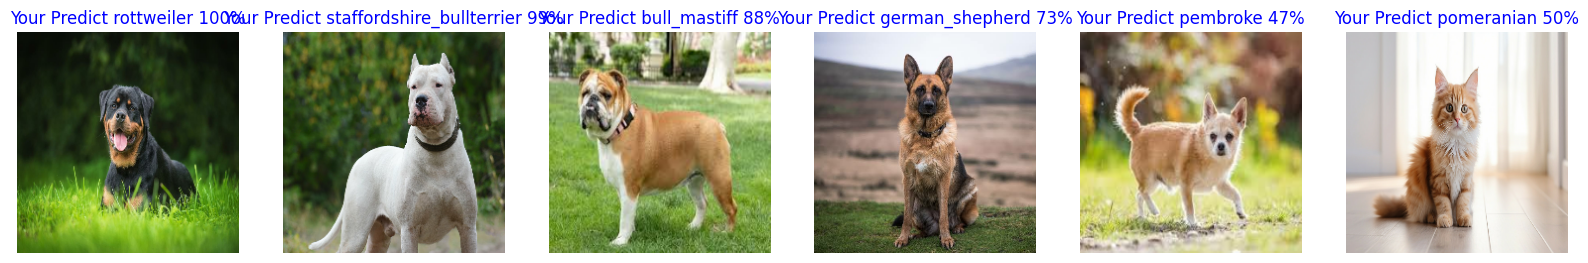

In [137]:
evaluate_our_test(predict_test,test_test)

In [138]:
enumerate(resim)

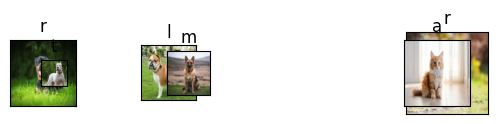

In [141]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(resim):
  predict_label=unique_breeds[np.argmax(predict_test[i])]
  plt.subplot(1, len(predict_label), i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(predict_label[i])
  plt.imshow(image)